In [438]:
# Name: Chandni Sathish Kumar
# Github Username: ChandniSathishKumar
# USC ID: 6700594537, sathishk@usc.edu

In [439]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols


In [495]:
print(sklearn.__version__)


1.4.0


In [441]:
warnings.filterwarnings('ignore')

In [442]:
display(Markdown('# The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.')) 

# The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

In [443]:
display(Markdown('# Download the Combined Cycle Power Plant'))


# Download the Combined Cycle Power Plant

In [444]:
file_path = "../data/Folds5x2_pp.xlsx"
data = pd.read_excel(file_path)
df=data
data.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [445]:
display(Markdown('# Exploring the data: i. How many rows are in this data set? How many columns? What do the rows and columns represent?'))


# Exploring the data: i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [446]:

# Print the number of rows and columns
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

# Description of what rows and columns represent
print("\nThe rows in the dataset represent hourly recordings of ambient variables from a Combined Cycle Power Plant over 6 years (2006-2011), under full load conditions. Each row is a data point consisting of hourly averages of ambient variables.")
print("\nThe columns represent the following ambient variables and the output:")
print("AT (Ambient Temperature): The ambient temperature in °C")
print("V (Exhaust Vacuum): The exhaust vacuum in cm Hg")
print("AP (Ambient Pressure): The ambient pressure in millibar")
print("RH (Relative Humidity): The relative humidity in %")
print("PE (Net hourly electrical energy output): The net hourly electrical energy output of the plant in MW")


Number of rows: 9568
Number of columns: 5

The rows in the dataset represent hourly recordings of ambient variables from a Combined Cycle Power Plant over 6 years (2006-2011), under full load conditions. Each row is a data point consisting of hourly averages of ambient variables.

The columns represent the following ambient variables and the output:
AT (Ambient Temperature): The ambient temperature in °C
V (Exhaust Vacuum): The exhaust vacuum in cm Hg
AP (Ambient Pressure): The ambient pressure in millibar
RH (Relative Humidity): The relative humidity in %
PE (Net hourly electrical energy output): The net hourly electrical energy output of the plant in MW


In [447]:
display(Markdown('# ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings'))

# ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings

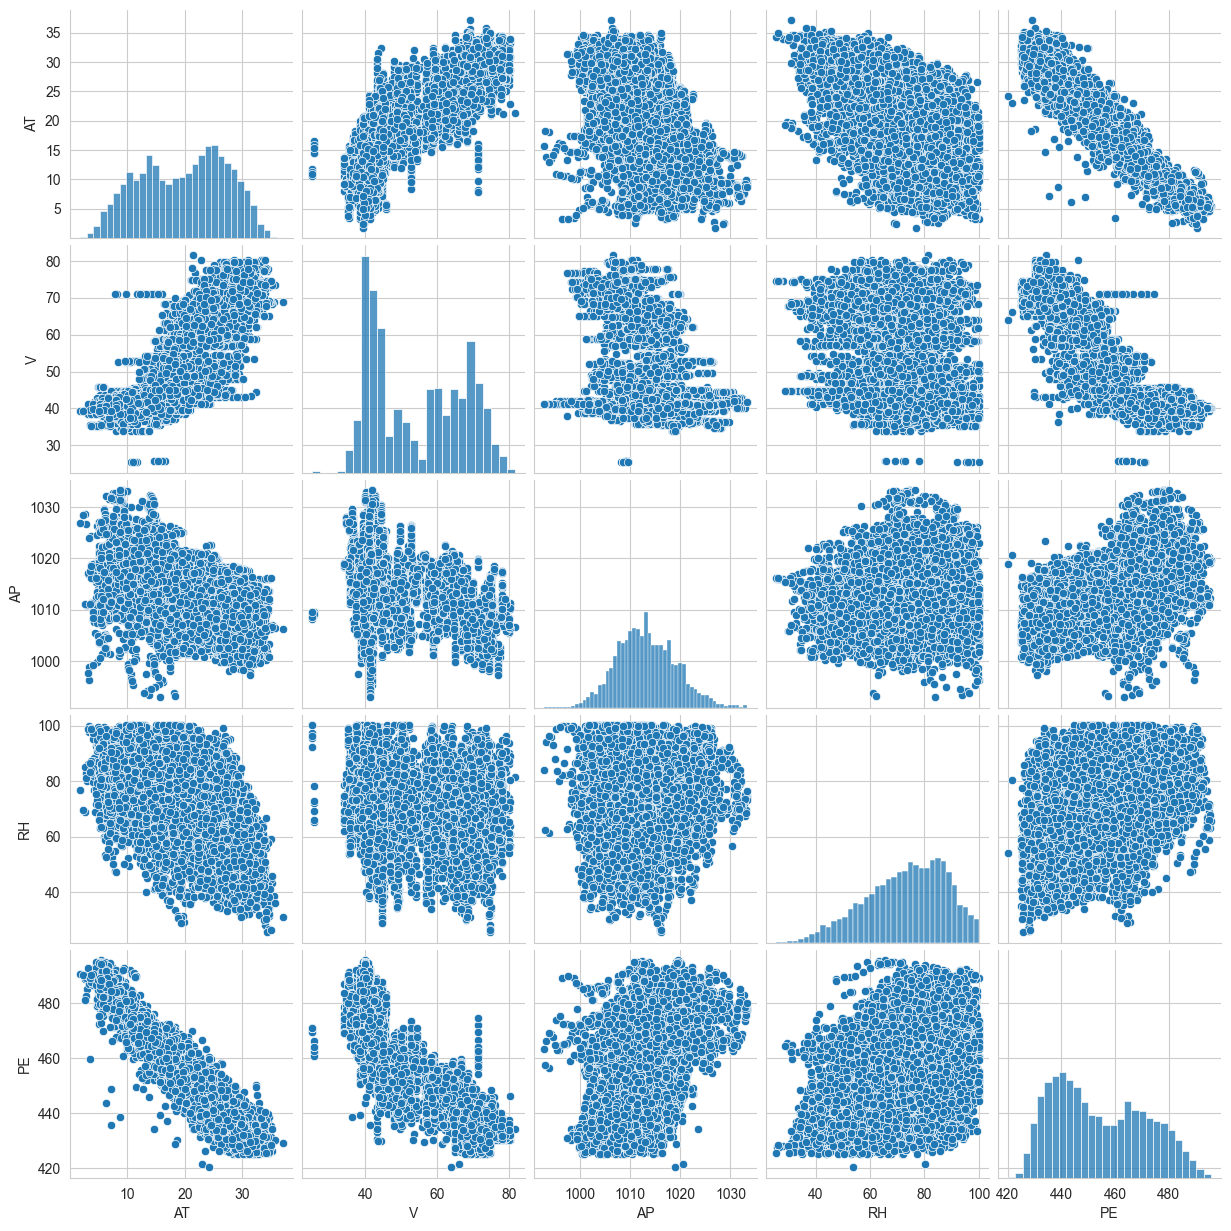


Strong Correlation:
AT and V appear to have a positive correlation with each other as the scatter plot shows a trend where increases in AT are associated with increases in V.
AT and PE show a negative correlation, meaning as the temperature increases, the power output decreases.
Similarly, V and PE also seem to have a negative correlation, where higher exhaust vacuum is associated with lower power output.

Weak or No Correlation:
AP and other variables do not display a clear linear relationship, suggesting a weak or no correlation.
RH also seems to have a weak or no correlation with AT, V, and PE, as the data points are widely scattered.

Outliers:
The scatter plot between AP and other variables, especially PE, shows a cluster of points at higher values, which could indicate potential outliers or a different population subset.
Similarly, the RH vs. PE scatter plot shows some data points that stray from the main cluster!



In [448]:
#creating pairwise scatterplots for all variables
sns.pairplot(data)
plt.show()
print('''
Strong Correlation:
AT and V appear to have a positive correlation with each other as the scatter plot shows a trend where increases in AT are associated with increases in V.
AT and PE show a negative correlation, meaning as the temperature increases, the power output decreases.
Similarly, V and PE also seem to have a negative correlation, where higher exhaust vacuum is associated with lower power output.

Weak or No Correlation:
AP and other variables do not display a clear linear relationship, suggesting a weak or no correlation.
RH also seems to have a weak or no correlation with AT, V, and PE, as the data points are widely scattered.

Outliers:
The scatter plot between AP and other variables, especially PE, shows a cluster of points at higher values, which could indicate potential outliers or a different population subset.
Similarly, the RH vs. PE scatter plot shows some data points that stray from the main cluster!
''')

In [449]:
display(Markdown('# iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.'))



# iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [450]:
descriptive_stats = data.describe()  # This gives us mean, std, min, 25%, 50%, 75%, max for each variable
descriptive_stats.loc['range'] = descriptive_stats.loc['max'] - descriptive_stats.loc['min']  # Range
descriptive_stats.loc['IQR'] = descriptive_stats.loc['75%'] - descriptive_stats.loc['25%']  # Interquartile Range

summary_stats = descriptive_stats.loc[['mean', '50%', 'range', '25%', '75%', 'IQR']]
summary_stats.rename(index={'50%': 'median', '25%': 'Q1', '75%': 'Q3'}, inplace=True)

summary_stats


,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
median,20.345000,52.080000,1012.940000,74.975000,451.550000
range,35.300000,56.200000,40.410000,74.600000,75.500000
Q1,13.510000,41.740000,1009.100000,63.327500,439.750000
Q3,25.720000,66.540000,1017.260000,84.830000,468.430000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


In [451]:
display(Markdown(' # (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?'))

 # (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [452]:
predictors = ['AT', 'V', 'AP', 'RH']

results = {}

for predictor in predictors:
    X = data[[predictor]]
    y = data['PE']
    X_with_constant = sm.add_constant(X)  # Adding a constant for intercept term
    
    model = sm.OLS(y, X_with_constant, missing='drop').fit()  # 'missing=drop' to ignore NaNs
    results[predictor] = model

#summary
for predictor, model in results.items():
    print(f"Results for {predictor}:")
    print(model.summary())
    print("\n---\n")





Results for AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:15:31   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3

In [453]:
print('AT (Ambient Temperature) and V (Exhaust Vacuum) show strong, statistically significant associations with the response variable PE, as very low p-values (almost 0). This indicates that both temperature and vacuum have a significant impact on the power output, with R-squared values of 0.899 and 0.757. They explain a substantial portion of the variance in PE.')

print('AP (Ambient Pressure) and RH (Relative Humidity) also show statistically significant associations with PE, given their p-values are 0. However, their lower R-squared values, 0.269 for AP and 0.152 for RH, indicate that while significant, they explain a smaller fraction of the variance in PE compared to AT and V.')

AT (Ambient Temperature) and V (Exhaust Vacuum) show strong, statistically significant associations with the response variable PE, as very low p-values (almost 0). This indicates that both temperature and vacuum have a significant impact on the power output, with R-squared values of 0.899 and 0.757. They explain a substantial portion of the variance in PE.
AP (Ambient Pressure) and RH (Relative Humidity) also show statistically significant associations with PE, given their p-values are 0. However, their lower R-squared values, 0.269 for AP and 0.152 for RH, indicate that while significant, they explain a smaller fraction of the variance in PE compared to AT and V.


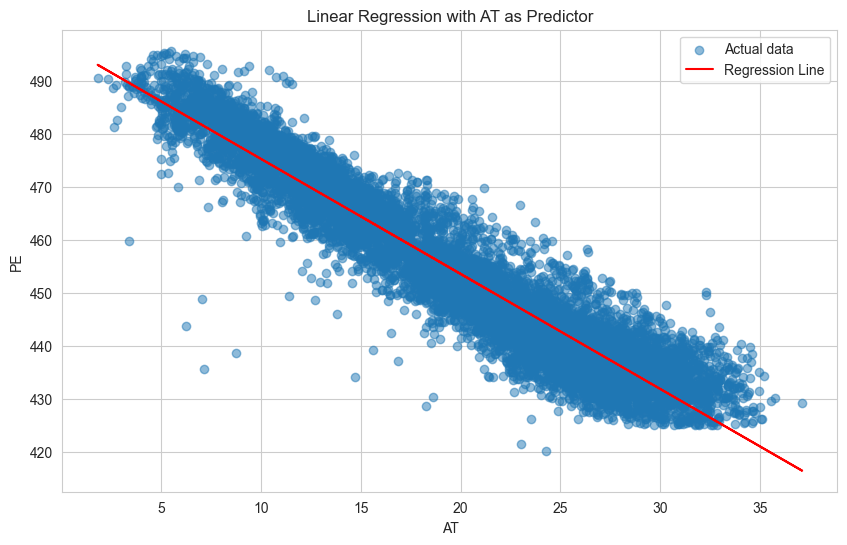

In [454]:

plt.figure(figsize=(10, 6))
predictor = 'AT'
X = data[predictor]
y = data['PE']
plt.scatter(X, y, alpha=0.5, label='Actual data')
plt.plot(X, results[predictor].predict(sm.add_constant(X)), color='red', label='Regression Line')
plt.xlabel(predictor)
plt.ylabel('PE')
plt.title(f"Linear Regression with {predictor} as Predictor")
plt.legend()
plt.show()

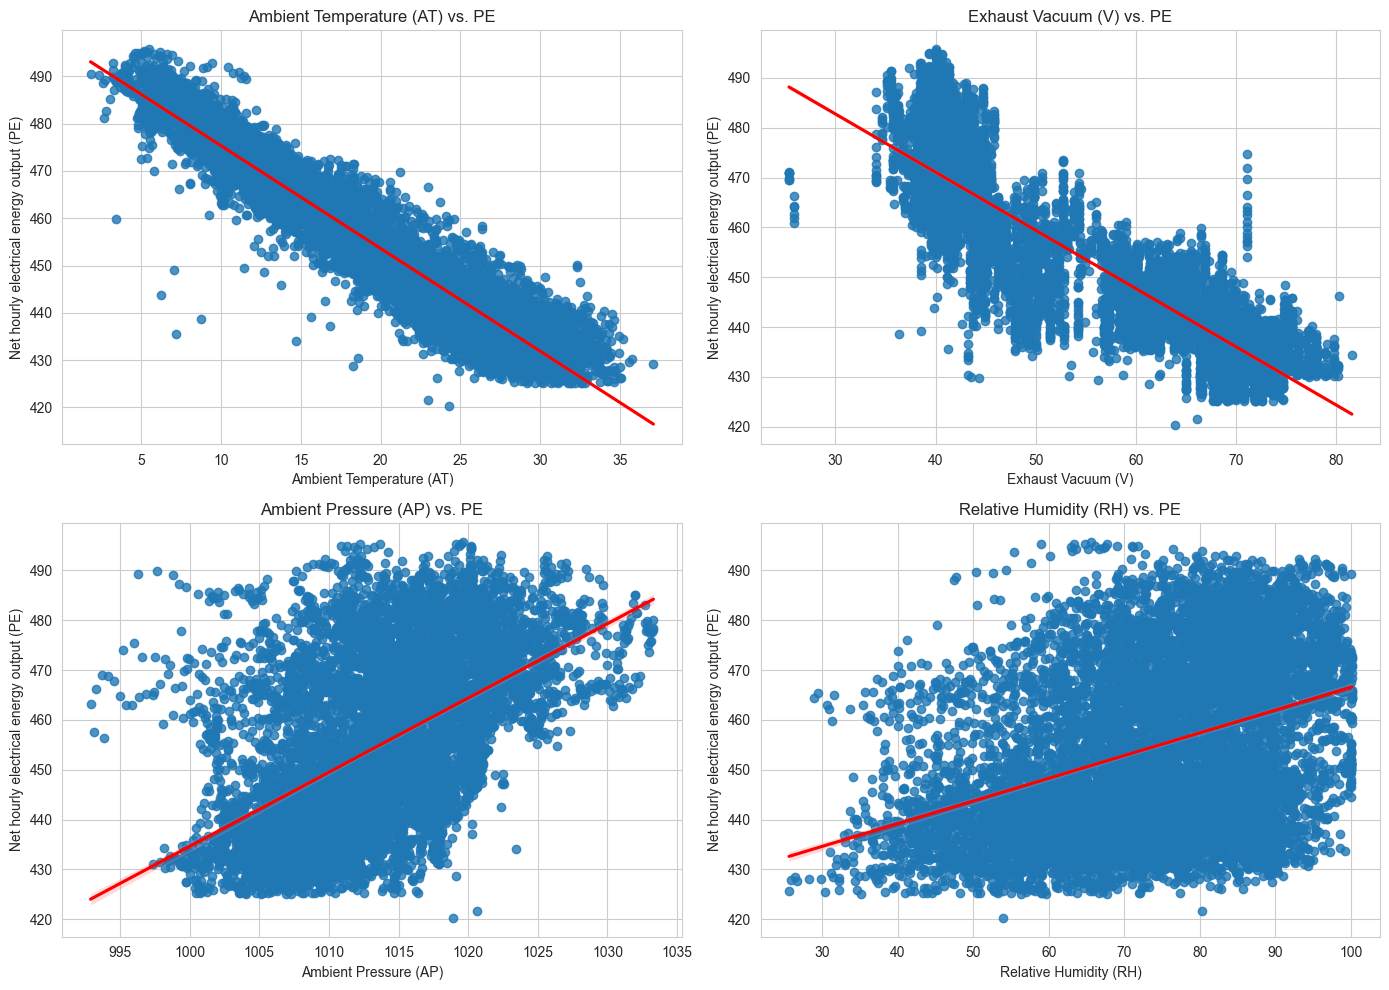

In [455]:

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating subplots for each predictor variable
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Ambient Temperature vs. PE
sns.regplot(x='AT', y='PE', data=data, ax=axs[0, 0], line_kws={"color": "red"})
axs[0, 0].set_title('Ambient Temperature (AT) vs. PE')
axs[0, 0].set_xlabel('Ambient Temperature (AT)')
axs[0, 0].set_ylabel('Net hourly electrical energy output (PE)')

# Exhaust Vacuum vs. PE
sns.regplot(x='V', y='PE', data=data, ax=axs[0, 1], line_kws={"color": "red"})
axs[0, 1].set_title('Exhaust Vacuum (V) vs. PE')
axs[0, 1].set_xlabel('Exhaust Vacuum (V)')
axs[0, 1].set_ylabel('Net hourly electrical energy output (PE)')

# Ambient Pressure vs. PE
sns.regplot(x='AP', y='PE', data=data, ax=axs[1, 0], line_kws={"color": "red"})
axs[1, 0].set_title('Ambient Pressure (AP) vs. PE')
axs[1, 0].set_xlabel('Ambient Pressure (AP)')
axs[1, 0].set_ylabel('Net hourly electrical energy output (PE)')

# Relative Humidity vs. PE
sns.regplot(x='RH', y='PE', data=data, ax=axs[1, 1], line_kws={"color": "red"})
axs[1, 1].set_title('Relative Humidity (RH) vs. PE')
axs[1, 1].set_xlabel('Relative Humidity (RH)')
axs[1, 1].set_ylabel('Net hourly electrical energy output (PE)')

plt.tight_layout()
plt.show()



In [456]:
display(Markdown('#  Are there any outliers that you would like to remove from your data for each of these regression tasks?'))

#  Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [457]:

null_values = data.isnull().sum()


print(null_values)



AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


Using Box Plots to Visualize Outliers


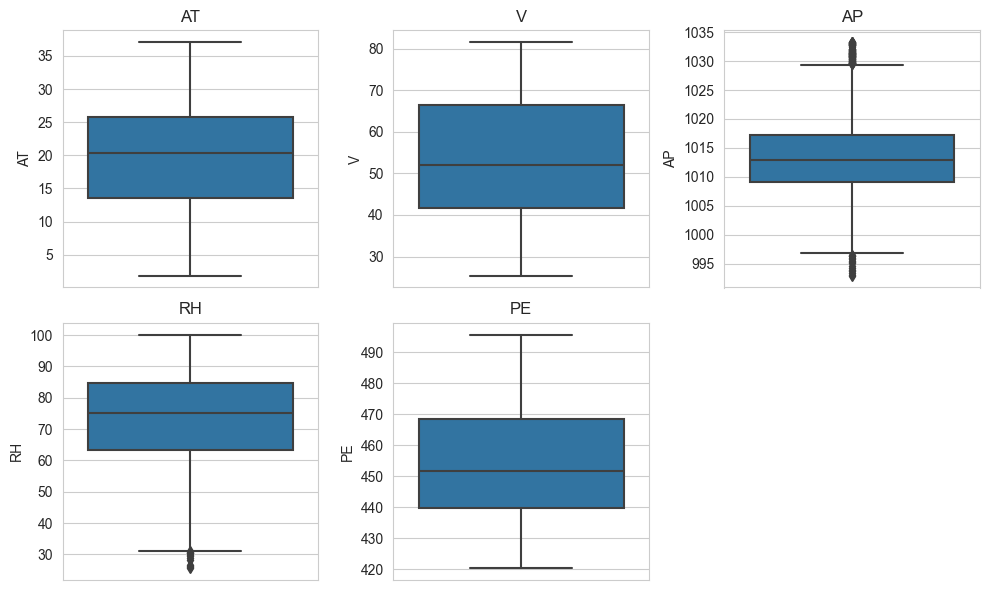

In [458]:
print("Using Box Plots to Visualize Outliers")
# List of predictors and the response variable
variables = ['AT', 'V', 'AP', 'RH', 'PE']

# Create box plots for each variable
plt.figure(figsize=(10, 6))
for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[var])
    plt.title(var)

plt.tight_layout()
plt.show()


In [459]:
print("Identifying Outliers with the Interquartile Range (IQR)")
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those beyond 1.5 * IQR from the Q1 and Q3
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_data = data[outliers]

print(f"Number of outliers detected: {outlier_data.shape[0]}")
print("Outlier indices:", outlier_data.index.tolist())


Identifying Outliers with the Interquartile Range (IQR)
Number of outliers detected: 100
Outlier indices: [238, 319, 368, 536, 571, 631, 669, 715, 753, 789, 810, 847, 983, 1091, 1250, 1290, 1388, 1583, 1660, 1808, 2003, 2060, 2262, 2298, 2372, 2395, 2447, 2481, 2579, 2761, 2972, 2977, 2989, 3015, 3021, 3066, 3213, 3412, 3443, 3483, 3492, 3603, 3766, 3796, 3955, 4067, 4125, 4202, 4327, 4367, 4697, 4793, 4928, 5006, 5067, 5431, 5529, 5690, 5706, 5805, 5840, 5863, 5928, 5956, 6006, 6346, 6472, 6581, 6708, 6789, 6829, 6925, 7077, 7186, 7320, 7485, 7623, 7807, 7892, 7983, 8061, 8098, 8104, 8133, 8270, 8379, 8411, 8462, 8568, 8737, 8751, 9015, 9060, 9068, 9074, 9075, 9159, 9267, 9342, 9366]


In [460]:
print("Identifying Outliers with Z-scores")
# Calculate Z-scores of the data
z_scores = np.abs(stats.zscore(data.dropna()))  # dropna() to exclude missing values for calculation

# Define outliers as those where the z-score is greater than 3
outliers_z = (z_scores > 3).any(axis=1)
outlier_data_z = data[outliers_z]

print(f"Number of outliers detected using Z-scores: {outlier_data_z.shape[0]}")
print("Outlier indices using Z-scores:", outlier_data_z.index.tolist())


Identifying Outliers with Z-scores
Number of outliers detected using Z-scores: 58
Outlier indices using Z-scores: [319, 536, 669, 715, 753, 789, 810, 847, 1091, 1250, 1660, 2262, 2298, 2481, 2579, 2761, 3015, 3021, 3213, 3412, 3483, 3603, 3796, 3955, 4067, 4125, 4327, 4367, 5431, 5529, 5690, 5805, 5840, 5863, 5928, 5956, 6006, 6346, 6789, 7077, 7186, 7320, 7485, 7807, 7892, 8061, 8098, 8104, 8133, 8270, 8462, 8568, 8751, 9015, 9068, 9159, 9267, 9342]


In [461]:
print('''
Yes, there are outliers present.
The presence of outliers in the variables Ambient Pressure (AP) and Relative Humidity (RH) can be seen in the provided box plots. 
Outliers are typically defined as data points that lie outside the whiskers of the box plot, which generally extend to 1.5 times the interquartile range (IQR) from the box's edges.
I would like to remove them, only if
1. they are heavily skewing regression results or model predictions, they might need to be addressed.

2. Could the outliers be due to errors in data collection, entry, or processing? If there's evidence of error, they should likely be removed.

3. If only a small percentage of the data are outliers, they might be removed with minimal impact on the dataset. 

5. Some models are more sensitive to outliers than others. Linear regression models can be significantly impacted by outliers!

6. It's also useful to consult with domain experts when making such decisions.
''')                                                                                                                                                                              


Yes, there are outliers present.
The presence of outliers in the variables Ambient Pressure (AP) and Relative Humidity (RH) can be seen in the provided box plots. 
Outliers are typically defined as data points that lie outside the whiskers of the box plot, which generally extend to 1.5 times the interquartile range (IQR) from the box's edges.
I would like to remove them, only if
1. they are heavily skewing regression results or model predictions, they might need to be addressed.

2. Could the outliers be due to errors in data collection, entry, or processing? If there's evidence of error, they should likely be removed.

3. If only a small percentage of the data are outliers, they might be removed with minimal impact on the dataset. 

5. Some models are more sensitive to outliers than others. Linear regression models can be significantly impacted by outliers!

6. It's also useful to consult with domain experts when making such decisions.



In [462]:
display(Markdown('# (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis. H0 : βj = 0?'))

# (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis. H0 : βj = 0?

In [463]:


# Define the predictor variables (excluding the response variable PE)
X = data[['AT', 'V', 'AP', 'RH']]
# Define the response variable
y = data['PE']

# Adding a constant for the intercept
X_with_constant = sm.add_constant(X)

# Fit the OLS model
multi_reg_model = sm.OLS(y, X_with_constant).fit()

# Summary of the model
multi_reg_results = multi_reg_model.summary()

# Print the results summary
print(multi_reg_results)

# Extracting p-values to identify which predictors have statistically significant association
p_values = multi_reg_model.pvalues

# Identifying predictors for which we can reject the null hypothesis (p < 0.05)
significant_predictors = p_values[p_values < 0.05].index.tolist()
significant_predictors.remove('const')  # Remove the constant if it's in the list

print("\nPredictors for which we can reject the null hypothesis:")
print(significant_predictors)



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:15:39   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [464]:
display(Markdown('# Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?'))

# Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [465]:
print('''
The results from the multiple regression analysis suggest a very strong model for predicting the net hourly electrical energy output (PE) of the power plant, with an ( R^2 ) value of 0.929. This indicates that approximately 92.9% of the variability in the energy output can be explained by the four ambient variables in the model.

Each predictor variable (Ambient Temperature 'AT', Exhaust Vacuum 'V', Ambient Pressure 'AP', and Relative Humidity 'RH') shows a statistically significant association with the response variable, as indicated by very low p-values (effectively zero for all predictors). This allows us to reject the null hypothesis for all four predictors, meaning each one contributes significantly to the model.

The coefficients of the model imply that:
- A one-unit increase in 'AT' results in a 1.9775-unit decrease in 'PE'.
- A one-unit increase in 'V' leads to a 0.2339-unit decrease in 'PE'.
- A one-unit increase in 'AP' results in a 0.0621-unit increase in 'PE'.
- A one-unit increase in 'RH' causes a 0.1581-unit decrease in 'PE'.

However, the model shows potential for multicollinearity cause of high condition number. Multicollinearity occurs when predictors are correlated with each other, which makes the model unstable and the estimation of the individual effect of each predictor unreliable.
''')


The results from the multiple regression analysis suggest a very strong model for predicting the net hourly electrical energy output (PE) of the power plant, with an ( R^2 ) value of 0.929. This indicates that approximately 92.9% of the variability in the energy output can be explained by the four ambient variables in the model.

Each predictor variable (Ambient Temperature 'AT', Exhaust Vacuum 'V', Ambient Pressure 'AP', and Relative Humidity 'RH') shows a statistically significant association with the response variable, as indicated by very low p-values (effectively zero for all predictors). This allows us to reject the null hypothesis for all four predictors, meaning each one contributes significantly to the model.

The coefficients of the model imply that:
- A one-unit increase in 'AT' results in a 1.9775-unit decrease in 'PE'.
- A one-unit increase in 'V' leads to a 0.2339-unit decrease in 'PE'.
- A one-unit increase in 'AP' results in a 0.0621-unit increase in 'PE'.
- A one-unit

In [466]:
display(Markdown('# (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.'))

# (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [467]:
display(Markdown('# How do your results from 1c compare to your results from 1d?'))

# How do your results from 1c compare to your results from 1d?

In [468]:
print('''
Comparing the results from the univariate regressions (1c) to those of the multiple regression (1d), we see changes in the coefficients and significance of the predictors when they are considered together.

In the univariate regressions:

AT had a coefficient of -2.1713.
V had a coefficient of -1.1681.
AP had a coefficient of 1.4899.
RH had a coefficient of 0.4557.
In the multiple regression, the coefficients are:

In the multivariate regressions:

AT has a smaller magnitude at -1.9775.
V's coefficient reduces significantly to -0.2339.
AP shows a small positive coefficient of 0.0621, much less than in the univariate case.
RH's coefficient also decreases to -0.1581.
This change in the coefficients suggests that some of the effects captured by the predictors in the univariate regressions are actually shared with other predictors. When these predictors are included together in the multiple regression, the shared variance is accounted for, and the unique contribution of each predictor is isolated. As a result, the coefficients in the multiple regression may be smaller in magnitude or even change sign compared to the univariate regression coefficients.

All predictors (AT, V, AP, RH) are statistically significant in both the univariate and multiple regression models (p < 0.05), indicating that we can reject the null hypothesis for each predictor in both cases.
''')


Comparing the results from the univariate regressions (1c) to those of the multiple regression (1d), we see changes in the coefficients and significance of the predictors when they are considered together.

In the univariate regressions:

AT had a coefficient of -2.1713.
V had a coefficient of -1.1681.
AP had a coefficient of 1.4899.
RH had a coefficient of 0.4557.
In the multiple regression, the coefficients are:

In the multivariate regressions:

AT has a smaller magnitude at -1.9775.
V's coefficient reduces significantly to -0.2339.
AP shows a small positive coefficient of 0.0621, much less than in the univariate case.
RH's coefficient also decreases to -0.1581.
This change in the coefficients suggests that some of the effects captured by the predictors in the univariate regressions are actually shared with other predictors. When these predictors are included together in the multiple regression, the shared variance is accounted for, and the unique contribution of each predictor is 

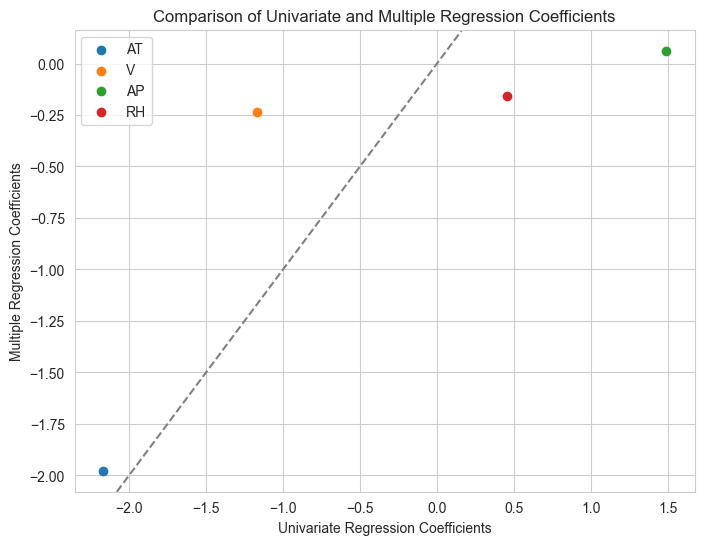

In [469]:
univariate_coeffs = {
    'AT': -2.1713,
    'V': -1.1681,
    'AP': 1.4899,
    'RH': 0.4557
}

multiple_coeffs = {
    'AT': -1.9775,
    'V': -0.2339,
    'AP': 0.0621,
    'RH': -0.1581
}

plt.figure(figsize=(8, 6))
for predictor in univariate_coeffs.keys():
    plt.scatter(univariate_coeffs[predictor], multiple_coeffs[predictor], label=predictor)

# Add labels and title
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.title('Comparison of Univariate and Multiple Regression Coefficients')
plt.axline((0, 0), slope=1, color='grey', linestyle='--')  # y=x line for reference
plt.legend()
plt.show()


In [470]:
display(Markdown('# (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form. Y = β0 + β1X + β2*X^2 + β3X^3 + Epsilon'))

# (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form. Y = β0 + β1X + β2*X^2 + β3X^3 + Epsilon

In [492]:
for predictor in predictors:
    X = data[[predictor]].dropna()
    
    X['X_squared'] = X[predictor] ** 2
    X['X_cubed'] = X[predictor] ** 3
    
    y = data.loc[X.index, 'PE'] 
    
    # Adding a constant for the intercept
    X_with_constant = sm.add_constant(X)
    
    poly_model = sm.OLS(y, X_with_constant).fit()
    polynomial_models[predictor] = poly_model
    print("predictor",predictor)
    #  MSE for the training set
    mse_train = mean_squared_error(y_train, y_pred_train)
    print(f"Training MSE: {mse_train}")
    

for predictor, model in polynomial_models.items():
    print(f"Results for {predictor}:")
    print(model.summary())
    print("\n---\n")



predictor AT
Training MSE: 560.0889299113404
predictor V
Training MSE: 560.0889299113404
predictor AP
Training MSE: 560.0889299113404
predictor RH
Training MSE: 560.0889299113404
Results for AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:28:58   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
               

In [474]:
print('''
The results of the polynomial regression models for each predictor variable indicate that there is evidence of non-linear association between the predictors and the response variable (PE). This is because the polynomial terms (squared and cubed) are statistically significant, as suggested by the p-values for these terms being less than 0.05, allowing us to reject the null hypothesis that beta2 = 0, beta3 = 0.

-AT (Ambient Temperature): The presence of significant coefficients indicates a non-linear relationship with PE. The model has R-squared 0.912, which is better than the linear model's R-squared of 0.899. Thus, the non-linear terms capture additional variance in PE !!

-V (Exhaust Vacuum): While the squared term is not significant (p = 0.768), the cubed term is (p < 0.05), implies some degree of non-linear relationship between V and PE.

-AP (Ambient Pressure): The coefficients are significant, implying a non-linear relationship with PE.

-RH (Relative Humidity): Similar to AP, suggests a non-linear relationship with PE.

The significant cubic terms for each predictor imply that the relationship between the predictors and PE is not purely quadratic but involves more complex non-linear dynamics. 

However, the numbers suggest potential multicollinearity issues. 

In conclusion, the results provide evidence of non-linear associations between the predictors and the response variable, but the signs of multicollinearity should be evaluated to ensure the findings are right!
''')


The results of the polynomial regression models for each predictor variable indicate that there is evidence of non-linear association between the predictors and the response variable (PE). This is because the polynomial terms (squared and cubed) are statistically significant, as suggested by the p-values for these terms being less than 0.05, allowing us to reject the null hypothesis that beta2 = 0, beta3 = 0.

-AT (Ambient Temperature): The presence of significant coefficients indicates a non-linear relationship with PE. The model has R-squared 0.912, which is better than the linear model's R-squared of 0.899. Thus, the non-linear terms capture additional variance in PE !!

-V (Exhaust Vacuum): While the squared term is not significant (p = 0.768), the cubed term is (p < 0.05), implies some degree of non-linear relationship between V and PE.

-AP (Ambient Pressure): The coefficients are significant, implying a non-linear relationship with PE.

-RH (Relative Humidity): Similar to AP, s

In [475]:
display(Markdown('# (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.'))

# (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [476]:
formula = 'PE ~ AT + V + AP + RH + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH'

full_interaction_model = ols(formula, data=data).fit()

full_interaction_results = full_interaction_model.summary()

#summary
print(full_interaction_results)

interaction_p_values = full_interaction_model.pvalues
significant_interactions = interaction_p_values[interaction_p_values < 0.05].index.tolist()

significant_interactions = [term for term in significant_interactions if ':' in term]
print("Yes, there is evidence of association of interactions of predictors with the response")
print("\nStatistically significant interaction terms:")
print(significant_interactions)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:26:39   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

In [477]:
display(Markdown(' # (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.'))

 # (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [478]:
#model 1

X = data[['AT', 'V', 'AP', 'RH']]  # Predictor variables
y = data['PE']  # Response variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_const).fit()

print(model.summary())



model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

y_pred_train = model_sklearn.predict(X_train)

mse_train_all = mean_squared_error(y_train, y_pred_train)
print(f"Training MSE: {mse_train_all}")

y_pred_test = model_sklearn.predict(X_test)
mse_test_all = mean_squared_error(y_test, y_pred_test)
print(f"Test MSE: {mse_test_all}")



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:26:39   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.8414     11.502     40.673      0.0

In [479]:
#model 2

X = np.array(df [df.columns[:-1]]) 
y = np.array(df ['PE'])
my_features = ['AT', 'V', 'AP', 'RH'] 
interact_combinations = []
for value in range(1,5):
    interact_combinations.extend(combinations (my_features, value))

#interactions
interact_features = PolynomialFeatures(4, interaction_only=True)
interact_train = interact_features.fit_transform(X)
interactions = pd.DataFrame(interact_train).drop(0, axis=1)
interactions.rename(columns=dict (zip (interactions.columns, interact_combinations)), inplace=True)

#quadratic terms
quadratic_features = PolynomialFeatures(2,include_bias=False, interaction_only=False)
quadratic_train = quadratic_features.fit_transform(X)
quadratic_feature_names = quadratic.get_feature_names_out(data.columns[:-1])
quadratic_terms = pd.DataFrame (quadratic_train)
quadratic_terms.rename( columns=dict (zip(quadratic_terms.columns, quadratic_feature_names)), inplace=True)

quadratic_terms = pd.DataFrame(quadratic_train)
quadratic_terms.rename(columns=dict (zip (quadratic_terms.columns, quadratic_feature_names)), inplace=True)

for feature in quadratic_terms.columns:
    col=quadratic_terms[feature]
    if '^2' in feature:
        interactions[feature] = col
all_features = interactions.copy(deep=True)
X_train, X_test,y_train, y_test= train_test_split(all_features,y,test_size=0.3, random_state=1)

X_train_const = sm.add_constant(X_train)
initial_model = sm.OLS(y_train, X_train_const).fit()
print(initial_model.summary())

print(f'Training MSE: {train_error}')
print(f'Test MSE: {test_error}')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     5415.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:26:39   Log-Likelihood:                -19117.
No. Observations:                6697   AIC:                         3.827e+04
Df Residuals:                    6677   BIC:                         3.841e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -4

In [480]:
# Extract p-values and identify insignificant variables
p_values = initial_model.pvalues
print("P-values:\n", p_values)

# Set a threshold for significance
alpha = 0.05
insignificant_vars = p_values[p_values >= alpha].index.tolist()
print("Insignificant Variables based on p-values:\n", insignificant_vars)

# Drop insignificant variables from X_train and X_test
X_train_significant = X_train_const.drop(columns=insignificant_vars)
X_test_const = sm.add_constant(X_test)  # Ensure test data has a constant term
X_test_significant = X_test_const.drop(columns=insignificant_vars)

# Refit the model with only significant variables
refined_model = sm.OLS(y_train, X_train_significant).fit()
print(refined_model.summary())

# Make predictions on the training and test sets using the refined model
y_train_pred = refined_model.predict(X_train_significant)
y_test_pred = refined_model.predict(X_test_significant)

# Calculate and print MSE for both the training and test datasets
mse_train_significant = mean_squared_error(y_train, y_train_pred)
mse_test_significant = mean_squared_error(y_test, y_test_pred)

print(f'Training MSE: {mse_train_significant}')
print(f'Test MSE: {mse_test_significant}')

P-values:
 const              5.592888e-03
(AT,)              4.546286e-09
(V,)               5.177539e-06
(AP,)              5.694119e-07
(RH,)              6.572919e-03
(AT, V)            4.079672e-08
(AT, AP)           6.652662e-09
(AT, RH)           1.028938e-04
(V, AP)            6.009423e-06
(V, RH)            8.883831e-03
(AP, RH)           6.203916e-03
(AT, V, AP)        4.593965e-08
(AT, V, RH)        9.401821e-04
(AT, AP, RH)       9.784013e-05
(V, AP, RH)        9.125716e-03
(AT, V, AP, RH)    9.549965e-04
AT^2               1.882024e-05
V^2                7.236607e-01
AP^2               5.345419e-12
RH^2               1.102462e-10
dtype: float64
Insignificant Variables based on p-values:
 ['V^2']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-sta

In [481]:
print(f"1st model Training MSE: {mse_train_all}, Test MSE: {mse_test_all}")
print(f"Significant Variables Model - Train MSE: {mse_train_significant}, Test MSE: {mse_test_significant}")

1st model Training MSE: 20.580839725738695, Test MSE: 21.239856938225497
Significant Variables Model - Train MSE: 17.659835780955838, Test MSE: 17.876198495906


In [482]:
X_train.columns = X_train.columns.map(str)
X_test.columns = X_test.columns.map(str)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_errors_raw = []
test_errors_raw = []
train_errors_scaled = []
test_errors_scaled = []

# Range of k values
k_values = range(1, 101)

for k in k_values:
    # KNN with raw features
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    y_pred_train_raw = knn_raw.predict(X_train)
    y_pred_test_raw = knn_raw.predict(X_test)
    train_errors_raw.append(mean_squared_error(y_train, y_pred_train_raw))
    test_errors_raw.append(mean_squared_error(y_test, y_pred_test_raw))
    
    # KNN with scaled features
    knn_scaled = KNeighborsRegressor(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_train_scaled = knn_scaled.predict(X_train_scaled)
    y_pred_test_scaled = knn_scaled.predict(X_test_scaled)
    train_errors_scaled.append(mean_squared_error(y_train, y_pred_train_scaled))
    test_errors_scaled.append(mean_squared_error(y_test, y_pred_test_scaled))


In [483]:
display(Markdown(' # (i) KNN Regression: i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the best fit. Plot the train and test errors in terms of 1/k.'))

 # (i) KNN Regression: i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

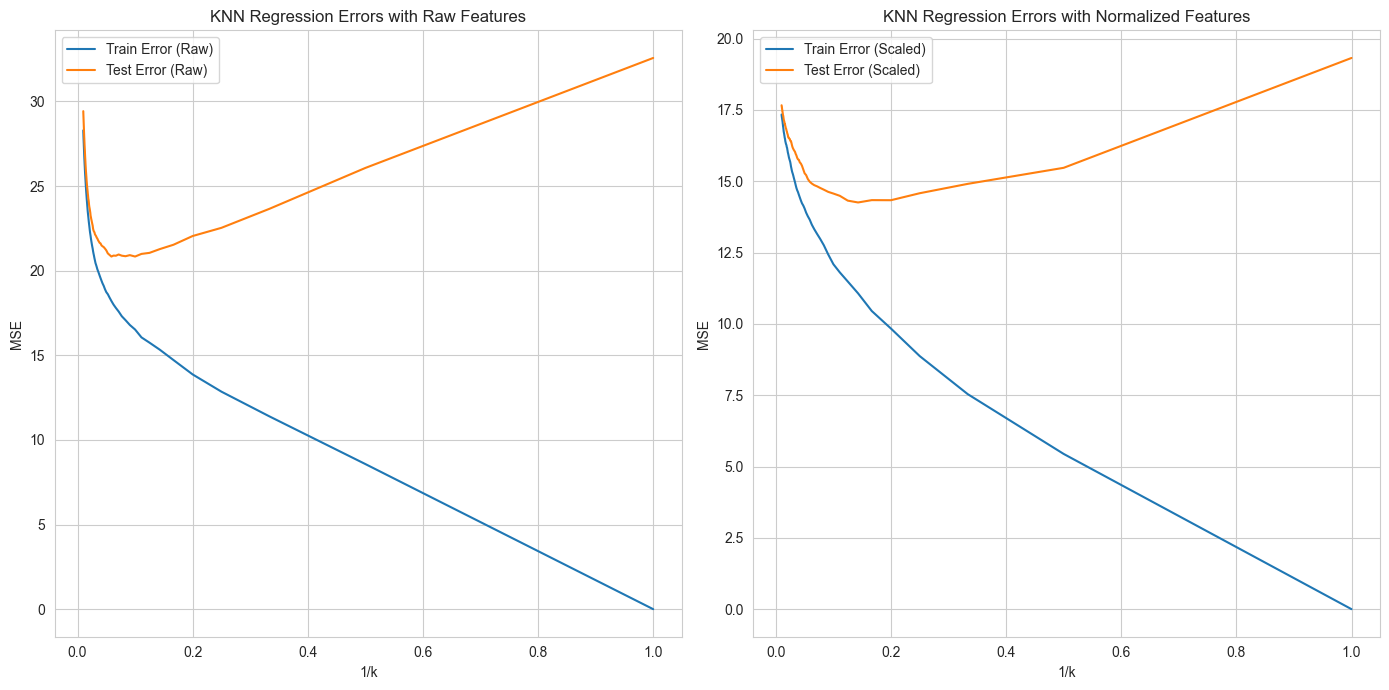

Best k (Raw Features): 10, Test MSE: 20.834638069662137
Best k (Scaled Features): 7, Test MSE: 14.25457005167794


In [484]:
plt.figure(figsize=(14, 7))

# Plotting for raw features
plt.subplot(1, 2, 1)
plt.plot([1/k for k in k_values], train_errors_raw, label='Train Error (Raw)')
plt.plot([1/k for k in k_values], test_errors_raw, label='Test Error (Raw)')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('KNN Regression Errors with Raw Features')
plt.legend()

# Plotting for normalized features
plt.subplot(1, 2, 2)
plt.plot([1/k for k in k_values], train_errors_scaled, label='Train Error (Scaled)')
plt.plot([1/k for k in k_values], test_errors_scaled, label='Test Error (Scaled)')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('KNN Regression Errors with Normalized Features')
plt.legend()

plt.tight_layout()
plt.show()
#best k for raw features
best_k_raw = k_values[np.argmin(test_errors_raw)]
print(f"Best k (Raw Features): {best_k_raw}, Test MSE: {min(test_errors_raw)}")

#best k for scaled features
best_k_scaled = k_values[np.argmin(test_errors_scaled)]
print(f"Best k (Scaled Features): {best_k_scaled}, Test MSE: {min(test_errors_scaled)}")


In [485]:
display(Markdown(' # (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.'))

 # (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [486]:
display(Markdown(' # KNN has Test MSE: 14.199548141375448 for scaled features and Test MSE: 20.834638069662137 for Raw Features.')) 
display(Markdown(' # Linear Regression which had quadratic and interaction terms Model - Train MSE: 17.659835780955838, Test MSE: 17.876198495906'))
print('''
The KNN regression with scaled features outperforms the linear regression model on the test set, as indicated by its lower MSE. This suggests that for this particular dataset, the relationships between the features and the target variable might be nonlinear or too complex for a simple linear model to capture effectively.

The performance of the KNN regression with raw features is the worst, which shows how important feature scaling is when using algorithms that compute distances!

The linear regression model shows consistent performance between training and testing, which suggests a stable model that is likely not overfitting. 
However, it does not perform as well as the KNN with scaled features, due to the linear model's inability to capture more complex relationships between variables..
''')

 # KNN has Test MSE: 14.199548141375448 for scaled features and Test MSE: 20.834638069662137 for Raw Features.

 # Linear Regression which had quadratic and interaction terms Model - Train MSE: 17.659835780955838, Test MSE: 17.876198495906


The KNN regression with scaled features outperforms the linear regression model on the test set, as indicated by its lower MSE. This suggests that for this particular dataset, the relationships between the features and the target variable might be nonlinear or too complex for a simple linear model to capture effectively.

The performance of the KNN regression with raw features is the worst, which shows how important feature scaling is when using algorithms that compute distances!

The linear regression model shows consistent performance between training and testing, which suggests a stable model that is likely not overfitting. 
However, it does not perform as well as the KNN with scaled features, due to the linear model's inability to capture more complex relationships between variables..



In [487]:
print("ISLR: 2.4.1")

ISLR: 2.4.1


In [488]:
display(Markdown( ' # For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.(a) The sample size n is extremely large, and the number of predictors p is small.(b) The number of predictors p is extremely large, and the number of observations n is small.(c) The relationship between the predictors and response is highly non-linear.(d) The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.'))

 # For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.(a) The sample size n is extremely large, and the number of predictors p is small.(b) The number of predictors p is extremely large, and the number of observations n is small.(c) The relationship between the predictors and response is highly non-linear.(d) The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.

In [489]:
print("""

(a) The sample size n is extremely large, and the number of predictors p is small.
A flexible method is likely to perform better than an inflexible method.
With a large sample size, a flexible method can learn the underlying data structure without overfitting, given the relative scarcity of predictors. The large amount of data helps the model to capture more complex patterns without as high a risk of capturing noise as signal.

(b) The number of predictors p is extremely large, and the number of observations n is small.
An inflexible method is likely to perform better than a flexible method.
With a small number of observations compared to the number of predictors, flexible methods are at a higher risk of overfitting, capturing noise in the data as if it were a genuine pattern. Inflexible methods, being less sensitive to the data's noise, are less likely to overfit in this scenario.

(c) The relationship between the predictors and response is highly non-linear.
A flexible method is likely to perform better than an inflexible method.
Flexible methods are more capable of modeling complex, non-linear relationships than inflexible methods, which might assume a linear or near-linear relationship. The ability to adapt to the data's structure allows flexible methods to better capture the underlying patterns when those patterns are non-linear.

(d) The variance of the error terms, i.e., σ^2 = Var(ε), is extremely high.
An inflexible method is likely to perform better than a flexible method.
High error variance implies a lot of noise in the outcomes relative to the signal (true underlying patterns). Flexible methods, which closely adapt to the data, might end up modeling this noise instead of the underlying signal, leading to overfitting. Inflexible methods, by not adapting as closely to the data, are less likely to capture this noise as a pattern, offering more robust predictions despite the high variance in errors.

""")




(a) The sample size n is extremely large, and the number of predictors p is small.
A flexible method is likely to perform better than an inflexible method.
With a large sample size, a flexible method can learn the underlying data structure without overfitting, given the relative scarcity of predictors. The large amount of data helps the model to capture more complex patterns without as high a risk of capturing noise as signal.

(b) The number of predictors p is extremely large, and the number of observations n is small.
An inflexible method is likely to perform better than a flexible method.
With a small number of observations compared to the number of predictors, flexible methods are at a higher risk of overfitting, capturing noise in the data as if it were a genuine pattern. Inflexible methods, being less sensitive to the data's noise, are less likely to overfit in this scenario.

(c) The relationship between the predictors and response is highly non-linear.
A flexible method is li

In [490]:
%%markdown
The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Obs. X1 X2 X3 Y
1 0 3 0 Red
2 2 0 0 Red
3 0 1 3 Red
4 0 1 2 Green
5 −1 0 1 Green
6 1 1 1 Red
Suppose we wish to use this data set to make a prediction for Y when
X1 = X2 = X3 = 0 using K-nearest neighbors.
(a) Compute the Euclidean distance between each observation and
the test point, X1 = X2 = X3 = 0.
(b) What is our prediction with K = 1? Why?
(c) What is our prediction with K = 3? Why?
(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or
small? Why?

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Obs. X1 X2 X3 Y
1 0 3 0 Red
2 2 0 0 Red
3 0 1 3 Red
4 0 1 2 Green
5 −1 0 1 Green
6 1 1 1 Red
Suppose we wish to use this data set to make a prediction for Y when
X1 = X2 = X3 = 0 using K-nearest neighbors.
(a) Compute the Euclidean distance between each observation and
the test point, X1 = X2 = X3 = 0.
(b) What is our prediction with K = 1? Why?
(c) What is our prediction with K = 3? Why?
(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or
small? Why?


In [493]:
print ( '''
To address the given task, let's break down each part:

(a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

Euclidean distance formula between two points (x1, x2, x3) and (y1, y2, y3) in a 3-dimensional space is:
d = sqrt((x1 - y1)^2 + (x2 - y2)^2 + (x3 - y3)^2)

For the test point (0, 0, 0), the distances are:

1. d1 = sqrt((0 - 0)^2 + (3 - 0)^2 + (0 - 0)^2) = 3
2. d2 = sqrt((2 - 0)^2 + (0 - 0)^2 + (0 - 0)^2) = 2
3. d3 = sqrt((0 - 0)^2 + (1 - 0)^2 + (3 - 0)^2) = sqrt(10) = 3.1
4. d4 = sqrt((0 - 0)^2 + (1 - 0)^2 + (2 - 0)^2) = sqrt(5) = 2.2
5. d5 = sqrt((-1 - 0)^2 + (0 - 0)^2 + (1 - 0)^2) = sqrt(2) = 1.4
6. d6 = sqrt((1 - 0)^2 + (1 - 0)^2 + (1 - 0)^2) = sqrt(3) = 1.73

(b) What is our prediction with K = 1? Why?

With K = 1, we look for the nearest neighbor only. The closest observation is Obs. 5 (d5 = sqrt(2)), which is labeled Green. Therefore, prediction is Green.

(c) What is our prediction with K = 3? Why?

With K = 3, we consider the three nearest neighbors, which are Obs. 5 (d5 = sqrt(2)), Obs. 2 (d2 = 2), and Obs. 6 (d6 = sqrt(3)). Among these, two are labeled Red (Obs. 2 and Obs. 6) and one is labeled Green (Obs. 5). Therefore, the majority vote is Red.

(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

If the Bayes decision boundary is highly nonlinear, a smaller K would generally be expected to perform better.

- Small K: More flexible models that can adapt to complex, nonlinear decision boundaries. They are better at capturing the intricacies of a highly nonlinear relationship.
- Large K: More inflexible models that tend to smooth over the data, potentially missing out on the nuances of a highly nonlinear boundary.

Hence, a small K would allow the model to more closely follow the nonlinear decision boundary, leading to potentially better classification performance in cases where the boundary is complex.
''')


To address the given task, let's break down each part:

(a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

Euclidean distance formula between two points (x1, x2, x3) and (y1, y2, y3) in a 3-dimensional space is:
d = sqrt((x1 - y1)^2 + (x2 - y2)^2 + (x3 - y3)^2)

For the test point (0, 0, 0), the distances are:

1. d1 = sqrt((0 - 0)^2 + (3 - 0)^2 + (0 - 0)^2) = 3
2. d2 = sqrt((2 - 0)^2 + (0 - 0)^2 + (0 - 0)^2) = 2
3. d3 = sqrt((0 - 0)^2 + (1 - 0)^2 + (3 - 0)^2) = sqrt(10) = 3.1
4. d4 = sqrt((0 - 0)^2 + (1 - 0)^2 + (2 - 0)^2) = sqrt(5) = 2.2
5. d5 = sqrt((-1 - 0)^2 + (0 - 0)^2 + (1 - 0)^2) = sqrt(2) = 1.4
6. d6 = sqrt((1 - 0)^2 + (1 - 0)^2 + (1 - 0)^2) = sqrt(3) = 1.73

(b) What is our prediction with K = 1? Why?

With K = 1, we look for the nearest neighbor only. The closest observation is Obs. 5 (d5 = sqrt(2)), which is labeled Green. Therefore, prediction is Green.

(c) What is our prediction with K = 3? Why?

With K = 3, we consider th